# Misc Boson Calculations

## 1D

$$
Z = \sum_i \exp\{-E_i/k_B T\} = Z = \sum_n \exp\{-n\hbar \omega/k_B T\} = (1-\exp\{-\beta\hbar \omega\})^{-1}
$$

$$
E_{h.o.} = \hbar \omega \Big(\frac{1}{e^{\hbar \omega / k_B T} - 1} + \frac{1}{2}\Big)
$$

### grand cannonical

$$ \bar{n} = \frac{1}{e^{E-\mu}-1}$$

### micro

$$ \bar{n} = \frac{1}{e^{\beta\hbar \omega}-1}$$

$$
e^{\beta \hbar \omega} = \frac{1+\bar{n}}{\bar{n}}\\
\chi =\beta \hbar \omega = \ln{\frac{1+\bar{n}}{\bar{n}}}
$$

probability in state:
$$
P(n) =  e^{-\beta E_n} / Z = 2 \sinh\Big\{\frac{\beta \hbar \omega}{2} \Big\} e^{-\beta (n +\frac{1}{2})\hbar \omega}\\
= 2 \sinh\Big\{\frac{\chi}{2} \Big\} e^{-\chi (n +\frac{1}{2})}\\
= 2 \sinh\Big\{\frac{\ln\Big\{ \frac{1+\bar{n}}{\bar{n}} \Big\}}{2} \Big\} \exp\Big\{-\ln\Big\{ \frac{1+\bar{n}}{\bar{n}} \Big\} (n +\frac{1}{2})\Big\}
$$

$$
= 2 \sinh\Big\{ \ln\Big\{\sqrt{\frac{1+\bar{n}}{\bar{n}}}\Big\} \Big\} \Big(\frac{1+\bar{n}}{\bar{n}}\Big)^{-(n+1/2)}
$$

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import MarksConstants as mc
matplotlib.style.use('dark_background')

In [6]:
sp.init_printing(use_latex=True)

In [5]:
nbar, n, alpha = sp.symbols('nbar, n, alpha', real=True, positive=True)

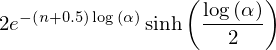

In [10]:
2*sp.sinh(sp.ln(alpha)/2)*sp.exp(-sp.ln(alpha)*(n+1/2))

In [11]:
sp.simplify(2*sp.sinh(sp.ln(alpha)/2)*sp.exp(-sp.ln(alpha)*(n+1/2)))

sympy doesn't seem to know that sinh(ln(x)) = (x^2-1)/(2x).

$$
= \alpha^{-(n+1/2)}\frac{(\alpha-1)}{\sqrt{\alpha}}
$$

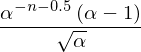

In [12]:
expr = alpha**(-(n+1/2))*(alpha-1)/(sp.sqrt(alpha))
expr

In [13]:
sp.simplify(expr.subs(alpha,(nbar+1)/nbar))

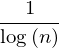

In [43]:
sp.simplify(1/sp.ln(n))

In [23]:
import MarksConstants as mc

In [25]:
def nbarFromTemp(T, nu):
    om = 2*np.pi*nu
    return 1/(np.exp(mc.hbar*om/(mc.k_B * T)) - 1)

In [7]:
def tempFromNbar(nbar, nu):
    return mc.hbar*2*np.pi*nu/mc.k_B / np.log((nbar+1)/nbar)

In [46]:
tempFromNbar(1, 150e3)*1e6

$$
\beta \hbar \omega = \ln{\frac{1+\bar{n}}{\bar{n}}}\\
T = \frac{\hbar\omega}{k_B} \Big(\ln\Big\{\frac{\bar{n}+1}{\bar{n}}\Big\}\Big)^{-1}
$$

In [32]:
nbarFromTemp(3e-6, 150e3)

$$ \bar{n} = \frac{1}{e^{\beta\hbar \omega}-1}$$

In [9]:
tempFromNbar(2, 150e3)*1e6

In [98]:
def prob(n, nbar):
    return nbar**n * (nbar+1)**(-n-1)

In [99]:
def prob_T(n, T, nu):
    nbar = nbarFromTemp(T, nu)
    return prob(n, nbar)

In [110]:
import Miscellaneous as misc

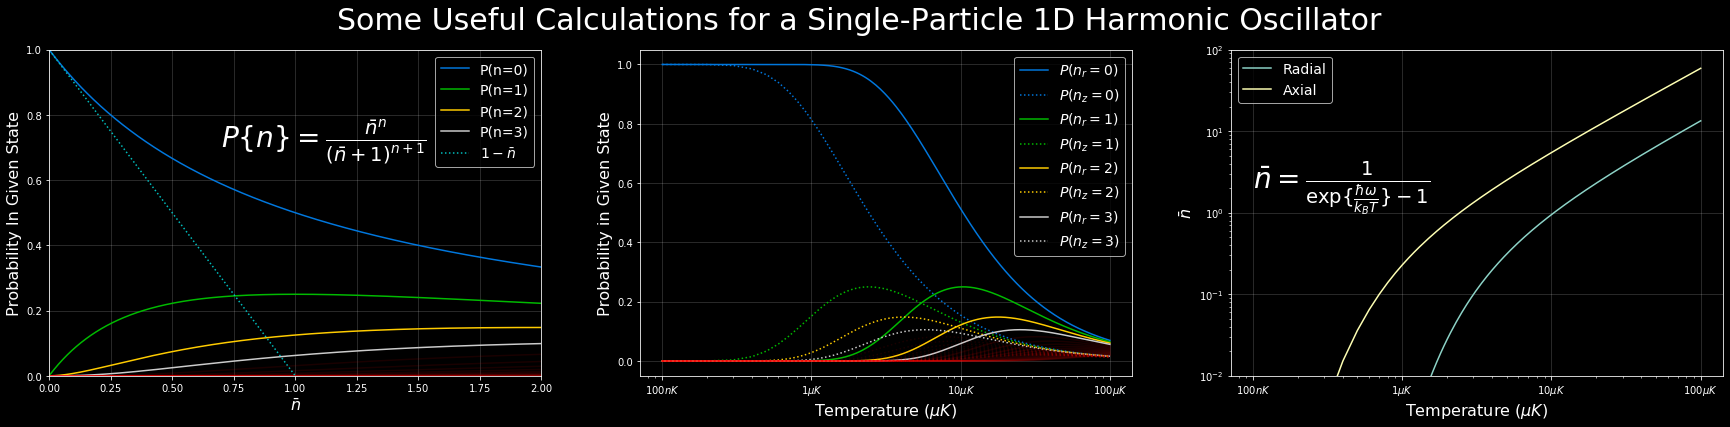

In [263]:
nbar = np.linspace(0,2,1001)[1:]
temps = np.linspace(1e-7, 1e-4, 1000)
fig, ax = plt.subplots(1,3,figsize=(30,6))
colors, _ = misc.getColors(4)
for n in range(4):
    ax[0].plot(nbar, prob(n,nbar),color=colors[n], label='P(n='+str(n)+')')   
for n in range(4,20):
    ax[0].plot(nbar, prob(n,nbar),color='r', alpha=0.1)   
#ax[0].plot(nbar, prob(1,nbar), label='P(n=1)')
#ax[0].plot(nbar, prob(2,nbar), label='P(n=2)')
#ax[0].plot(nbar, prob(3,nbar), label='P(n=3)')
ax[0].plot(nbar, 1-nbar, ':c', label=r'$1-\bar{n}$')
ax[0].set_xlim(0, max(nbar));
ax[0].set_xlabel(r'$\bar{n}$', fontsize=16)
ax[0].set_ylabel('Probability In Given State', fontsize=16)
ax[0].text(0.7,0.7,r'$P\{n\}=\frac{\bar{n}^n}{(\bar{n}+1)^{n+1}}$',fontsize=28)
ax[0].set_ylim(0, 1)
ax[0].legend(fontsize=14);
ax[0].grid(alpha=0.2)

ax[2].loglog(temps*1e6, nbarFromTemp(temps, 150e3), label='Radial')
ax[2].loglog(temps*1e6, nbarFromTemp(temps, 35e3), label='Axial')
ax[2].set_ylabel(r'$\bar{n}$', fontsize=16)
ax[2].set_xlabel('Temperature ($\mu K$)', fontsize=16)
ax[2].grid(alpha=0.2)
ax[2].set_ylim(1e-2,1e2)
ax[2].set_xticklabels(['$1\mu K$','$1\mu K$','$100 nK$','$1\mu K$','$10\mu K$','$100\mu K$'])
ax[2].legend(fontsize=14)
ax[2].text(0.1, 2, r'$\bar{n}=\frac{1}{\exp\{\frac{\hbar\omega}{k_B T}\}-1}$', fontsize=28)

for n in range(4):
    ax[1].semilogx(temps *1e6, prob_T(n, temps, 150e3), color=colors[n], label='$P(n_r='+str(n)+')$')
    ax[1].semilogx(temps *1e6, prob_T(n, temps, 35e3), color=colors[n], label='$P(n_z='+str(n)+')$', linestyle=':')
    
for n in range(4,20):
    ax[1].semilogx(temps *1e6, prob_T(n, temps, 150e3), color='r', alpha=0.1)
    ax[1].semilogx(temps *1e6, prob_T(n, temps, 35e3), color='r', alpha=0.1, linestyle=':')

ax[1].set_xlabel('Temperature ($\mu K$)', fontsize=16)
ax[1].set_ylabel('Probability in Given State', fontsize=16)
ax[1].set_xticklabels(['$1\mu K$','$1\mu K$','$100 nK$','$1\mu K$','$10\mu K$','$100\mu K$'])
ax[1].legend(fontsize=14)
ax[1].grid(alpha=0.2)
fig.suptitle('Some Useful Calculations for a Single-Particle 1D Harmonic Oscillator', fontsize=30);

In [180]:
import matplotlib.colors as colors

In [183]:
pops_rad.min()

In [264]:
388.875*1e-9/0.609e-6

In [188]:
import MatplotlibPlotters as mp

In [193]:
import mpl_toolkits.axes_grid1

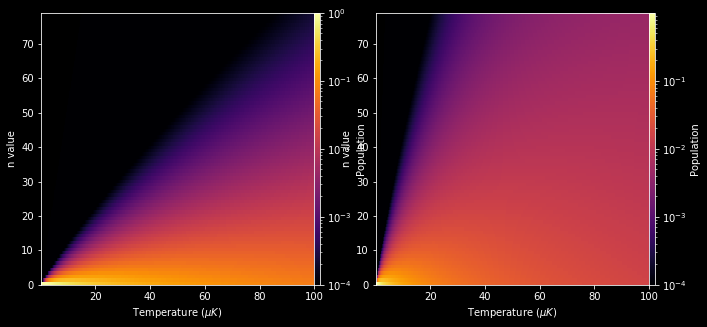

In [262]:
nval = np.arange(80)
temps = np.linspace(1e-7, 1e-4, 1000)
tempm, nvalm = np.meshgrid(temps, nval)
pops = np.zeros(nvalm.shape)
pops_rad = prob_T(nvalm, tempm, 150e3)
pops_ax = prob_T(nvalm, tempm, 35e3)
fig, axs = plt.subplots(1,2, figsize=(11,5))

im = axs[0].imshow(pops_rad, extent=(min(temps)*1e6, max(temps)*1e6, min(nval), max(nval)), aspect='auto', origin='bottom', cmap='inferno', vmin=1e-4,
                   norm=colors.LogNorm(vmin=pops_rad.min(), vmax=pops_rad.max()))
cax = mpl_toolkits.axes_grid1.make_axes_locatable(axs[0]).append_axes('right', size='2%')
fig.colorbar(im, cax=cax, orientation='vertical', label='Population')
axs[0].set_xlabel('Temperature ($\mu K$)')
axs[0].set_ylabel('n value')

im = axs[1].imshow(pops_ax, extent=(min(temps)*1e6, max(temps)*1e6, min(nval), max(nval)), aspect='auto', origin='bottom', cmap='inferno', vmin=1e-4,
                   norm=colors.LogNorm(vmin=pops_ax.min(), vmax=pops_ax.max()))
cax = mpl_toolkits.axes_grid1.make_axes_locatable(axs[1]).append_axes('right', size='2%')
fig.colorbar(im, cax=cax, orientation='vertical', label='Population')
axs[1].set_xlabel('Temperature ($\mu K$)')
axs[1].set_ylabel('n value');

original plot

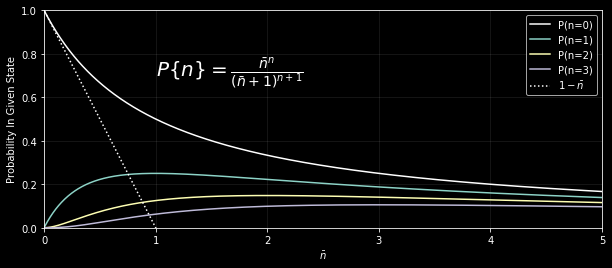

In [22]:
nbar = np.linspace(0,5,1001)[1:]
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(nbar, prob(0,nbar),'w', label='P(n=0)')
ax.plot(nbar, prob(1,nbar), label='P(n=1)')
ax.plot(nbar, prob(2,nbar), label='P(n=2)')
ax.plot(nbar, prob(3,nbar), label='P(n=3)')
ax.plot(nbar, 1-nbar, ':w', label=r'$1-\bar{n}$')
ax.set_xlim(0, max(nbar));
ax.set_xlabel(r'$\bar{n}$')
ax.set_ylabel('Probability In Given State')
ax.text(1,0.7,r'$P\{n\}=\frac{\bar{n}^n}{(\bar{n}+1)^{n+1}}$',fontsize=20)
ax.set_ylim(0, 1)
ax.legend();
ax.grid(alpha=0.1)

## Semi-Isotropic 2D

radially isotropic, but axial is different.

$$
Z = \sum_n\exp\{-\epsilon_n/k_B T\} = \sum_{n_x, n_y, n_z} \exp\{ -\hbar(\omega_x n_x + \omega_y n_y + \omega_z n_z)/k_B T\} = Z\{\omega_r\}^2 \times Z\{\omega_z\} \\
= \frac{1}{(1-\exp\{-\beta\hbar\omega_r\})^2(1-\exp\{-\beta\hbar\omega_z\})}
$$

$$
U=\frac{Nk_B T^2}{Z} \frac{\partial Z}{\partial T}
$$

In [73]:
N, k_B, T, hbar, om_r, om_z = sp.symbols('N k_B T hbar omega_r omega_z', real=True, positive=True)

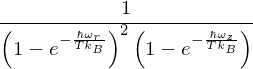

In [76]:
Z = 1/((1-sp.exp(-hbar*om_r/(k_B*T)))**2*(1-sp.exp(-hbar*om_z/(k_B * T))))
Z

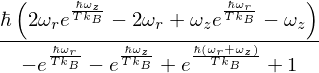

In [78]:
sp.simplify(k_B*T**2 * sp.diff(Z,T)/Z)

sanity check: suppose $\hbar \omega_r >> k_B T$, should reduce to single harmonic oscillator w/ $\omega_z$. After staring, it does.

$$
E=\frac{\hbar\Big(2\omega_r\exp\{\frac{\hbar \omega_z}{k_B T}\}-2\omega_r+\omega_z\exp\{\frac{\hbar \omega_r}{k_B T}\}-\omega_z\Big)}{1+\exp\{\frac{\hbar(\omega_r+\omega_z)}{k_B T}\}-\exp\{\frac{\hbar \omega_r}{k_B T}\}-\exp\{\frac{\hbar \omega_Z}{k_B T}\}}
$$

$$
=\frac{\hbar\Big(2\omega_r(\exp\{\frac{\hbar \omega_z}{k_B T}\}-1)+\omega_z(\exp\{\frac{\hbar \omega_r}{k_B T}\}-1)\Big)}{(1-\exp\{\frac{\hbar\omega_r}{k_B T}\})(1-\exp\{\frac{\hbar\omega_z}{k_B T}\})}
$$

$$
= 2 \frac{\hbar \omega_r}{\exp\{\frac{\hbar \omega_r}{k_B T}\}-1}+\frac{\hbar \omega_z}{\exp\{\frac{\hbar \omega_z}{k_B T}\}-1}
$$

$$
= 2\hbar \omega_r \bar{n}_r + \hbar \omega_z \bar{n}_z
$$

okay, this is very sensible, and doesn't require further work to understand in 3D. I might have guessed this, but it's good to make sure.

early check for isotropic

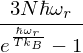

In [75]:
sp.simplify(N*k_B*T**2 * sp.diff(Z,T)/Z)